# load data

In [4]:
# import pandas as pd
# import numpy as np
# import os 
# import random

# # This should print the project folder
# os.chdir(os.path.dirname(os.getcwd()))
# os.getcwd()

In [3]:
import arcpy  
from arcpy.ia import * 
arcpy.CheckExtension("ImageAnalyst") 

'Available'

In [ ]:
arcpy.env.workspace = os.getcwd()
os.getcwd()

In [6]:
df_base = pd.read_csv('data/model_results/base_dice.csv').drop(columns='Unnamed: 0')
df_base

,type,fullnames,model,n_samples,avg_dice,tile_sizes,pixel_sizes,dice_sample_0,dice_sample_1,dice_sample_2,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,base,deeplab_256_10_n128_RESNET101,deeplab,128,0.589244,256,10,0.685554,0.256927,0.420910,...,0.406163,0.772173,0.469117,0.780101,0.795849,0.306391,0.335889,0.725463,0.182071,0.267182
1,base,deeplab_256_10_n128_RESNET50,deeplab,128,0.600972,256,10,0.540018,0.222096,0.705732,...,0.480318,0.763798,0.429047,0.786486,0.761073,0.307400,0.408742,0.752141,0.216347,0.347841
2,base,deeplab_256_10_n2_RESNET101,deeplab,2,0.393692,256,10,0.585899,0.123086,0.141912,...,0.253160,0.347950,0.191830,0.548945,0.557659,0.298516,0.072305,0.633313,0.130310,0.130294
3,base,deeplab_256_10_n2_RESNET50,deeplab,2,0.247585,256,10,0.211334,0.001265,0.194120,...,0.097586,0.393799,0.235793,0.414879,0.399762,0.309777,0.057560,0.342370,0.124348,0.117119
4,base,deeplab_256_10_n32_RESNET101,deeplab,32,0.553802,256,10,0.452675,0.017038,0.422436,...,0.544153,0.701277,0.458657,0.670675,0.765997,0.352707,0.247588,0.746277,0.444435,0.440018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,base,samlora_512_25_n2_VIT_L,samlora,2,0.050776,512,25,0.010332,0.000000,0.000000,...,0.015175,0.001649,0.000000,0.030453,0.033958,0.032124,0.011620,0.019918,0.003275,0.021819
60,base,samlora_512_25_n32_VIT_B,samlora,32,0.524171,512,25,0.346139,0.448550,0.261252,...,0.589109,0.819564,0.125229,0.774390,0.791439,0.230098,0.000000,0.592148,0.290741,0.502505
61,base,samlora_512_25_n32_VIT_L,samlora,32,0.555471,512,25,0.545117,0.005132,0.499168,...,0.592303,0.788177,0.205405,0.857826,0.764908,0.111264,0.098515,0.501678,0.291474,0.574111
62,base,samlora_512_25_n8_VIT_B,samlora,8,0.370755,512,25,0.374593,0.000000,0.241670,...,0.361441,0.372754,0.081148,0.635380,0.615724,0.184972,0.000000,0.427606,0.000590,0.217050


In [7]:
df_tl = pd.read_csv('data/model_results/tl_dice.csv').drop(columns='Unnamed: 0')
df_tl

,model,n_samples,avg_dice,type,tile_sizes,pixel_sizes,fullnames,dice_sample_0,dice_sample_1,dice_sample_2,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,128,0.666556,fine-tuned,256,10,deeplab_256_10_n128_RESNET101,0.508108,0.155469,0.817339,...,0.550970,0.815470,0.812174,0.787507,0.815788,0.397364,0.453800,0.763458,0.273268,0.421664
1,deeplab,128,0.648974,fine-tuned,256,10,deeplab_256_10_n128_RESNET50,0.359136,0.165002,0.869541,...,0.569293,0.819386,0.821053,0.792309,0.803506,0.391362,0.326712,0.732014,0.344266,0.647615
2,deeplab,2,0.402612,fine-tuned,256,10,deeplab_256_10_n2_RESNET101,0.169893,0.018485,0.000000,...,0.000000,0.248979,0.000000,0.649989,0.682966,0.305591,0.000000,0.504390,0.138832,0.227773
3,deeplab,2,0.386136,fine-tuned,256,10,deeplab_256_10_n2_RESNET50,0.373791,0.001502,0.000000,...,0.291119,0.612113,0.000000,0.479136,0.428640,0.266312,0.270152,0.694288,0.104458,0.021488
4,deeplab,32,0.665306,fine-tuned,256,10,deeplab_256_10_n32_RESNET101,0.476803,0.230345,0.774674,...,0.614993,0.850371,0.776648,0.771690,0.768064,0.401968,0.292754,0.757438,0.233621,0.591329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,samlora,2,0.359427,fine-tuned,512,25,samlora_512_25_n2_VIT_L,0.282893,0.000000,0.000000,...,0.507840,0.503175,0.124772,0.390057,0.663180,0.000000,0.441677,0.454188,0.004816,0.047314
60,samlora,32,0.505812,fine-tuned,512,25,samlora_512_25_n32_VIT_B,0.434552,0.000000,0.665874,...,0.568991,0.591799,0.312044,0.842294,0.754904,0.107504,0.209220,0.548598,0.183586,0.291597
61,samlora,32,0.448718,fine-tuned,512,25,samlora_512_25_n32_VIT_L,0.520071,0.188246,0.208382,...,0.378239,0.222046,0.299980,0.419913,0.721647,0.287835,0.625912,0.411532,0.265535,0.256036
62,samlora,8,0.455190,fine-tuned,512,25,samlora_512_25_n8_VIT_B,0.379197,0.000000,0.350172,...,0.488454,0.541206,0.151932,0.616064,0.790984,0.130061,0.308932,0.423300,0.119423,0.284818


In [8]:
concat = pd.concat([df_base,df_tl])
concat.isna().any()


type              False
fullnames         False
model             False
n_samples         False
avg_dice          False
tile_sizes        False
pixel_sizes       False
dice_sample_0     False
dice_sample_1     False
dice_sample_2     False
dice_sample_3     False
dice_sample_4     False
dice_sample_5     False
dice_sample_6     False
dice_sample_7     False
dice_sample_8     False
dice_sample_9     False
dice_sample_10    False
dice_sample_11    False
dice_sample_12    False
dice_sample_13    False
dice_sample_14    False
dice_sample_15    False
dice_sample_16    False
dice_sample_17    False
dice_sample_18    False
dice_sample_19    False
dice_sample_20    False
dice_sample_21    False
dice_sample_22    False
dice_sample_23    False
dice_sample_24    False
dice_sample_25    False
dice_sample_26    False
dice_sample_27    False
dice_sample_28    False
dice_sample_29    False
dtype: bool

In [9]:
concat.reset_index(drop=True,inplace=True)
concat

,type,fullnames,model,n_samples,avg_dice,tile_sizes,pixel_sizes,dice_sample_0,dice_sample_1,dice_sample_2,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,base,deeplab_256_10_n128_RESNET101,deeplab,128,0.589244,256,10,0.685554,0.256927,0.420910,...,0.406163,0.772173,0.469117,0.780101,0.795849,0.306391,0.335889,0.725463,0.182071,0.267182
1,base,deeplab_256_10_n128_RESNET50,deeplab,128,0.600972,256,10,0.540018,0.222096,0.705732,...,0.480318,0.763798,0.429047,0.786486,0.761073,0.307400,0.408742,0.752141,0.216347,0.347841
2,base,deeplab_256_10_n2_RESNET101,deeplab,2,0.393692,256,10,0.585899,0.123086,0.141912,...,0.253160,0.347950,0.191830,0.548945,0.557659,0.298516,0.072305,0.633313,0.130310,0.130294
3,base,deeplab_256_10_n2_RESNET50,deeplab,2,0.247585,256,10,0.211334,0.001265,0.194120,...,0.097586,0.393799,0.235793,0.414879,0.399762,0.309777,0.057560,0.342370,0.124348,0.117119
4,base,deeplab_256_10_n32_RESNET101,deeplab,32,0.553802,256,10,0.452675,0.017038,0.422436,...,0.544153,0.701277,0.458657,0.670675,0.765997,0.352707,0.247588,0.746277,0.444435,0.440018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,fine-tuned,samlora_512_25_n2_VIT_L,samlora,2,0.359427,512,25,0.282893,0.000000,0.000000,...,0.507840,0.503175,0.124772,0.390057,0.663180,0.000000,0.441677,0.454188,0.004816,0.047314
124,fine-tuned,samlora_512_25_n32_VIT_B,samlora,32,0.505812,512,25,0.434552,0.000000,0.665874,...,0.568991,0.591799,0.312044,0.842294,0.754904,0.107504,0.209220,0.548598,0.183586,0.291597
125,fine-tuned,samlora_512_25_n32_VIT_L,samlora,32,0.448718,512,25,0.520071,0.188246,0.208382,...,0.378239,0.222046,0.299980,0.419913,0.721647,0.287835,0.625912,0.411532,0.265535,0.256036
126,fine-tuned,samlora_512_25_n8_VIT_B,samlora,8,0.455190,512,25,0.379197,0.000000,0.350172,...,0.488454,0.541206,0.151932,0.616064,0.790984,0.130061,0.308932,0.423300,0.119423,0.284818


In [5]:
# %Code from Burkov 2020
def get_interval(values,confidence_level=95): # by default, for 95%
    lower = np.percentile(values, (100.0-confidence_level)/2.0)
    upper = np.percentile(values, confidence_level+((100.0-confidence_level)/2.0))
    return (lower, upper)

In [101]:
base_dict = {}

for n in [2, 8, 32, 128]:
    avg_per_n = float(df_base[(df_base['model'] == 'deeplab') & (df_base['n_samples'] == n)]['avg_dice'].mean().round(4))
    base_dict[f'avg_dice_{n}_samples'] = avg_per_n  
    lower, upper = get_interval(list(df_base[(df_base['model'] == 'deeplab') & (df_base['n_samples'] == n)]['avg_dice']))
    base_dict[f'lower_dice_{n}_samples'] = float(lower.round(4))
    base_dict[f'upper_dice_{n}_samples'] = float(upper.round(4))

base_dict


{'avg_dice_2_samples': 0.2354,
 'lower_dice_2_samples': 0.1013,
 'upper_dice_2_samples': 0.3921,
 'avg_dice_8_samples': 0.4066,
 'lower_dice_8_samples': 0.1611,
 'upper_dice_8_samples': 0.594,
 'avg_dice_32_samples': 0.4915,
 'lower_dice_32_samples': 0.3695,
 'upper_dice_32_samples': 0.5509,
 'avg_dice_128_samples': 0.5311,
 'lower_dice_128_samples': 0.4597,
 'upper_dice_128_samples': 0.6063}

In [102]:
base_dict = {}

for n in [2, 8, 32, 128]:
    avg_per_n = float(df_base[(df_base['model'] == 'samlora') & (df_base['n_samples'] == n)]['avg_dice'].mean().round(5))
    base_dict[f'avg_dice_{n}_samples'] = avg_per_n  
    lower, upper = get_interval(list(df_base[(df_base['model'] == 'samlora') & (df_base['n_samples'] == n)]['avg_dice']))
    base_dict[f'lower_dice_{n}_samples'] = float(lower.round(4))
    base_dict[f'upper_dice_{n}_samples'] = float(upper.round(4))
base_dict

{'avg_dice_2_samples': 0.40776,
 'lower_dice_2_samples': 0.0887,
 'upper_dice_2_samples': 0.5747,
 'avg_dice_8_samples': 0.49424,
 'lower_dice_8_samples': 0.3839,
 'upper_dice_8_samples': 0.5674,
 'avg_dice_32_samples': 0.52581,
 'lower_dice_32_samples': 0.4586,
 'upper_dice_32_samples': 0.5554,
 'avg_dice_128_samples': 0.54082,
 'lower_dice_128_samples': 0.462,
 'upper_dice_128_samples': 0.5913}

In [103]:
tl_dict = {}

for n in [2, 8, 32, 128]:
    avg_per_n = float(df_tl[(df_tl['model'] == 'deeplab') & (df_tl['n_samples'] == n)]['avg_dice'].mean().round(5))
    tl_dict[f'avg_dice_{n}_samples'] = avg_per_n  
    lower, upper = get_interval(list(df_tl[(df_tl['model'] == 'deeplab') & (df_tl['n_samples'] == n)]['avg_dice']))
    tl_dict[f'lower_dice_{n}_samples'] = float(lower.round(4))
    tl_dict[f'upper_dice_{n}_samples'] = float(upper.round(4))
tl_dict

{'avg_dice_2_samples': 0.41991,
 'lower_dice_2_samples': 0.3422,
 'upper_dice_2_samples': 0.4928,
 'avg_dice_8_samples': 0.51512,
 'lower_dice_8_samples': 0.412,
 'upper_dice_8_samples': 0.5909,
 'avg_dice_32_samples': 0.56568,
 'lower_dice_32_samples': 0.4748,
 'upper_dice_32_samples': 0.6605,
 'avg_dice_128_samples': 0.59093,
 'lower_dice_128_samples': 0.4392,
 'upper_dice_128_samples': 0.6635}

In [104]:
tl_dict = {}

for n in [2, 8, 32, 128]:
    avg_per_n = float(df_tl[(df_tl['model'] == 'samlora') & (df_tl['n_samples'] == n)]['avg_dice'].mean().round(5))
    tl_dict[f'avg_dice_{n}_samples'] = avg_per_n  
    lower, upper = get_interval(list(df_tl[(df_tl['model'] == 'samlora') & (df_tl['n_samples'] == n)]['avg_dice']))
    tl_dict[f'lower_dice_{n}_samples'] = float(lower.round(4))
    tl_dict[f'upper_dice_{n}_samples'] = float(upper.round(4))
tl_dict

{'avg_dice_2_samples': 0.50185,
 'lower_dice_2_samples': 0.3677,
 'upper_dice_2_samples': 0.6307,
 'avg_dice_8_samples': 0.52724,
 'lower_dice_8_samples': 0.4549,
 'upper_dice_8_samples': 0.588,
 'avg_dice_32_samples': 0.53311,
 'lower_dice_32_samples': 0.4504,
 'upper_dice_32_samples': 0.6256,
 'avg_dice_128_samples': 0.54414,
 'lower_dice_128_samples': 0.5093,
 'upper_dice_128_samples': 0.5858}

# Figure 2

In [11]:
df = concat.copy()

In [23]:
df_deeplab_base = df[(df['type']=='base') & (df['model']=='deeplab')]
df_deeplab_tl = df[(df['type']=='fine-tuned') & (df['model']=='deeplab')]

df_samlora_base = df[(df['type']=='base') & (df['model']=='samlora')]
df_samlora_tl = df[(df['type']=='fine-tuned') & (df['model']=='samlora')]

In [67]:
# Define a function to apply get_interval to each group
def compute_interval(group):
    return get_interval(group.tolist())  # Unpacking returns (lower95, upper95)

# Apply the function to each group
intervals = df_samlora_base.groupby('n_samples')['avg_dice'].apply(compute_interval)

# Convert the result into two separate columns
df_intervals = intervals.apply(pd.Series)  # Expands tuple into two columns
df_intervals.columns = ['lower95', 'upper95']

# Merge back with n_samples for reference (optional)
df_intervals = df_intervals.reset_index()

# Display result
df_intervals


,n_samples,lower95,upper95
0,2,0.088664,0.574656
1,8,0.392846,0.567354
2,32,0.458583,0.555373
3,128,0.461979,0.591314


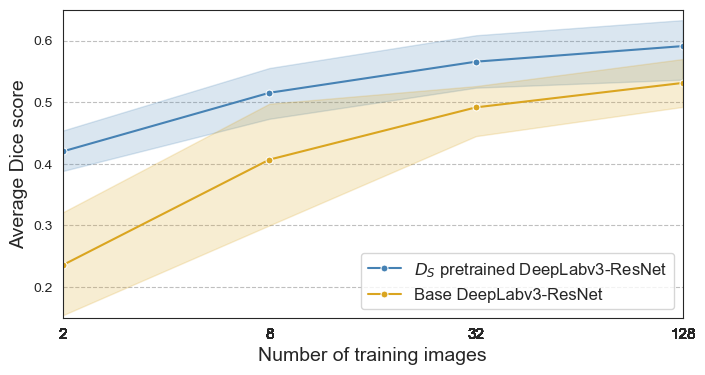

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.set_style('white')
plt.grid(axis='y', linestyle='--', color='gray',alpha=0.5)
ms = 5  # markersize

# Filter for 'model type' == 'ft'
sns.lineplot(data=df[(df['model'] == 'deeplab') & (df['type'] == 'fine-tuned')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label=r'$\mathit{D}_S$ pretrained DeepLabv3-ResNet', color='steelblue',
             marker='o'
             )

# Filter for 'model type' == 'base'
sns.lineplot(data=df[(df['model'] == 'deeplab') & (df['type'] == 'base')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base DeepLabv3-ResNet', color='goldenrod',
             marker='o'
             )

# Set x-axis to log scale
plt.xscale('log')

# Set custom x-ticks
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks,fontsize=11)  # Display numbers on x-axis
plt.xlim(2, 128)
plt.yticks([0.2,0.3,0.4,0.5,0.6])
plt.ylim(0.15,0.65)

# Label axes and title
plt.xlabel('Number of training images',fontsize=14)
plt.ylabel('Average Dice score',fontsize=14)
# plt.title('DeepLab: Average test-set Dice score with a 95% statistical interval')

plt.legend(loc='lower right',fontsize=12)
# Save the plot to file
plt.savefig('latex/figures/deeplab_dice_temp.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


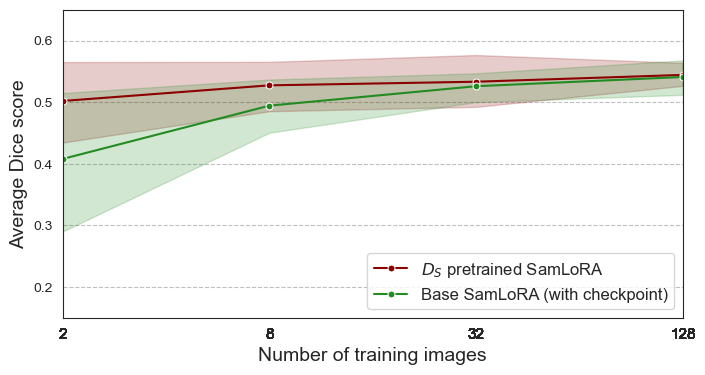

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.set_style('white')
plt.grid(axis='y', linestyle='--', color='gray',alpha=0.5)

ms = 5  # markersize

# Filter for 'model type' == 'ft'
sns.lineplot(data=df_samlora_tl,
             x='n_samples', y='avg_dice', marker = 'o', ms=ms, linestyle='-', label=r'$\mathit{D}_S$ pretrained SamLoRA', color='darkred')

# Filter for 'model type' == 'base'
sns.lineplot(data=df_samlora_base,
             x='n_samples', y='avg_dice', marker = 'o', ms=ms, linestyle='-', label='Base SamLoRA (with checkpoint)', color='forestgreen')

# Set x-axis to log scale
plt.xscale('log')

# Set custom x-ticks
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks,fontsize=11)  # Display numbers on x-axis
plt.xlim(2, 128)
plt.yticks([0.2,0.3,0.4,0.5,0.6])
plt.ylim(0.15,0.65)

# Label axes and title
plt.xlabel('Number of training images',fontsize=14)
plt.ylabel('Average Dice score',fontsize=14)
# plt.title('SamLoRA: Average test-set Dice score depending on the number of images, with a 95% statistical interval')

plt.legend(loc='lower right',fontsize=12)

# Save the plot to file
plt.savefig('latex/figures/samlora_dice_temp.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


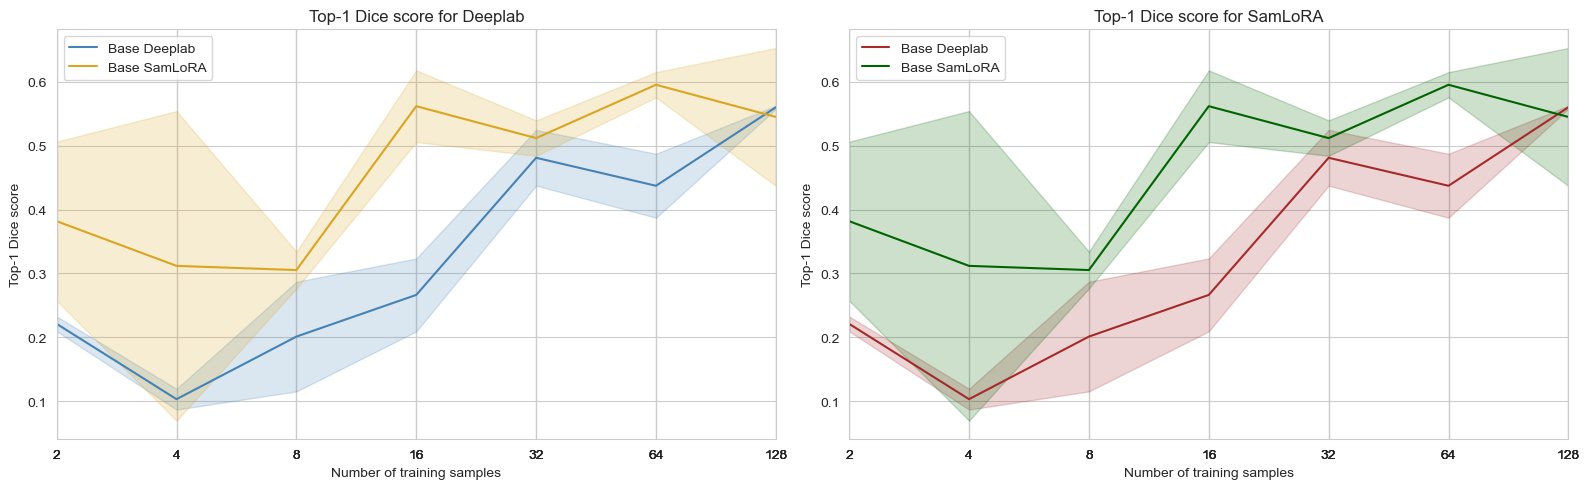

In [ ]:
# Create two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Set the style for seaborn
sns.set_style("whitegrid")

# Markersize
ms = 8.5

# First plot on the left axis
sns.lineplot(data=df[df['model']=='deeplab'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base Deeplab', color='steelblue', ax=axes[0])
sns.lineplot(data=df[df['model']=='samlora'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='goldenrod', ax=axes[0])

axes[0].set_xscale('log')
xticks = df['n_samples']
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticks)  # display numbers on x-axis
axes[0].set_xlim(2, 128)

axes[0].set_xlabel('Number of training samples')
axes[0].set_ylabel('Top-1 Dice score')
axes[0].set_title('Top-1 Dice score for Deeplab')

# Second plot on the right axis (you can customize it as you need)
sns.lineplot(data=df[df['model']=='deeplab'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base Deeplab', color='brown', ax=axes[1])
sns.lineplot(data=df[df['model']=='samlora'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='darkgreen', ax=axes[1])

axes[1].set_xscale('log')
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticks)
axes[1].set_xlim(2, 128)

axes[1].set_xlabel('Number of training samples')
axes[1].set_ylabel('Top-1 Dice score')
axes[1].set_title('Top-1 Dice score for SamLoRA')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure
# plt.savefig('latex/figures/plot_double_test.png',bbox_inches='tight', dpi=300)

# Show the plots
plt.show()


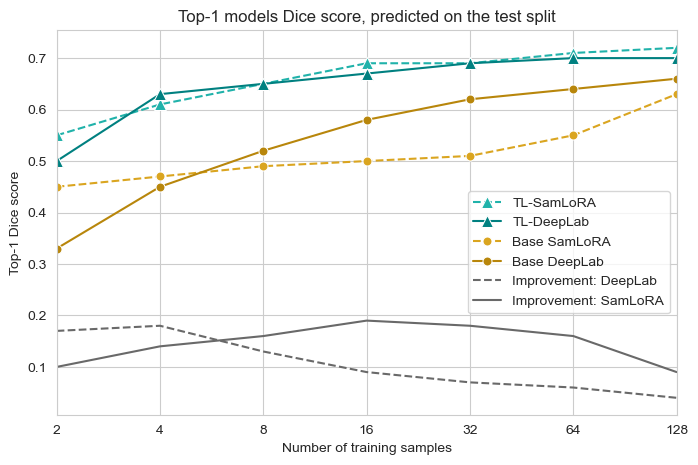

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ms = 8.5 # markersize

# seaborn lineplot
sns.lineplot(x=df['n_samples'], y=df['Dice TL-SamLoRA'], marker='^', ms=ms, linestyle='--', label='TL-SamLoRA', color='lightseagreen')
sns.lineplot(x=df['n_samples'], y=df['Dice TL-DeepLab'], marker='^', ms=ms, linestyle='-', label='TL-DeepLab', color='teal')
sns.lineplot(x=df['n_samples'], y=df['Dice base SamLoRA'], marker='o', ms=ms-2, linestyle='--', label='Base SamLoRA', color='goldenrod')
sns.lineplot(x=df['n_samples'], y=df['Dice base DeepLab'], marker='o', ms=ms-2, linestyle='-', label='Base DeepLab', color='darkgoldenrod')

# calculate change between base and tl models
df['deeplab_change'] = df['Dice TL-DeepLab'] - df['Dice base DeepLab']
df['samlora_change'] = df['Dice TL-SamLoRA'] - df['Dice base SamLoRA']

# plt.fill_between(df['n_samples'], df['Dice base DeepLab'], df['Dice TL-DeepLab'], alpha=0.2, color='slategrey')
# plt.fill_between(df['n_samples'], df['Dice base SamLoRA'], df['Dice TL-SamLoRA'], alpha=0.2, color='slategrey')

# plot the increase
sns.lineplot(x=df['n_samples'], y=df['deeplab_change'], linestyle='--', color='dimgrey', label='Improvement: DeepLab')
sns.lineplot(x=df['n_samples'], y=df['samlora_change'], linestyle='-', color='dimgrey', label='Improvement: SamLoRA')

# log scale x-axis
plt.xscale('log')
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks)  # dipslay numbers on x-axis
plt.xlim(2,128)

plt.xlabel('Number of training samples')
plt.ylabel('Top-1 Dice score')
plt.title('Top-1 models Dice score, predicted on the test split')

plt.legend(bbox_to_anchor=(1, 0.6))

plt.show()
plt.savefig('latex/figures/plot2_test.png',bbox_inches='tight',dpi=300)


# Figure 3

## pred

In [4]:
i = 0
pixelsize = 25
tilesize = 512
for n in os.listdir(f'data/fig_samples/pred_{tilesize}_{pixelsize}'):
    print(f'{n}: Sample {i}')
    i += 1

sample_10: Sample 0
sample_102: Sample 1
sample_107: Sample 2
sample_11: Sample 3
sample_118: Sample 4
sample_119: Sample 5
sample_120: Sample 6
sample_123: Sample 7
sample_130: Sample 8
sample_135: Sample 9
sample_141: Sample 10
sample_145: Sample 11
sample_152: Sample 12
sample_153: Sample 13
sample_156: Sample 14
sample_19: Sample 15
sample_2: Sample 16
sample_20: Sample 17
sample_41: Sample 18
sample_42: Sample 19
sample_44: Sample 20
sample_46: Sample 21
sample_49: Sample 22
sample_58: Sample 23
sample_68: Sample 24
sample_70: Sample 25
sample_75: Sample 26
sample_80: Sample 27
sample_89: Sample 28
sample_90: Sample 29


In [77]:
dice_sample = 'dice_sample_9'

In [88]:
base_df = pd.read_csv('data/model_results/base_dice_checkpoint64.csv')
base_df[(base_df['tile_sizes']==512) & (base_df['pixel_sizes']==25)].sort_values(dice_sample)[dice_sample].tail(n=15)

30    0.000000
58    0.023622
59    0.219021
27    0.367248
31    0.517511
62    0.521739
63    0.654538
28    0.682453
29    0.775944
25    0.786004
57    0.807079
24    0.808512
56    0.829869
60    0.831615
61    0.867618
Name: dice_sample_9, dtype: float64

In [96]:
base_df = pd.read_csv('data/model_results/base_dice_checkpoint64.csv')
base_df.sort_values(dice_sample)[dice_sample].tail(n=15)

1     0.307400
3     0.309777
37    0.312964
45    0.328097
34    0.346341
39    0.348049
6     0.351031
4     0.352707
43    0.359548
9     0.360961
32    0.371490
7     0.375879
51    0.387324
38    0.412028
36    0.417491
Name: dice_sample_25, dtype: float64

In [89]:
base_df.loc[61]

Unnamed: 0                              61
type                                  base
fullnames         samlora_512_25_n32_VIT_L
model                              samlora
n_samples                               32
avg_dice                          0.555471
tile_sizes                             512
pixel_sizes                             25
dice_sample_0                     0.545117
dice_sample_1                     0.005132
dice_sample_2                     0.499168
dice_sample_3                     0.008653
dice_sample_4                     0.758474
dice_sample_5                     0.358437
dice_sample_6                     0.465968
dice_sample_7                     0.818306
dice_sample_8                     0.891487
dice_sample_9                     0.867618
dice_sample_10                    0.472116
dice_sample_11                     0.60835
dice_sample_12                    0.503412
dice_sample_13                    0.770564
dice_sample_14                    0.864909
dice_sample

In [150]:
tl_df = pd.read_csv('data/model_results/tl_dice_checkpoint64.csv')
tl_df[(tl_df['tile_sizes']==512) & (tl_df['pixel_sizes']==25)].sort_values(dice_sample)[dice_sample].tail(n=15)

26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
58    0.000000
59    0.000000
60    0.000000
62    0.001955
57    0.034909
63    0.036982
61    0.051225
25    0.087905
56    0.091831
Name: dice_sample_3, dtype: float64

In [255]:
tl_df.sort_values(dice_sample)[dice_sample].tail(n=25)

45    0.101603
41    0.118617
42    0.119517
43    0.132004
55    0.148333
52    0.150199
49    0.171408
48    0.172426
1     0.179561
53    0.182636
37    0.186416
3     0.187483
34    0.192106
38    0.204315
39    0.213441
17    0.223490
7     0.254378
33    0.258205
5     0.263815
35    0.305062
0     0.306644
36    0.307662
6     0.309983
4     0.379376
32    0.417003
Name: dice_sample_3, dtype: float64

In [154]:
tl_df.loc[56]

Unnamed: 0                               56
model                               samlora
n_samples                               128
avg_dice                           0.421634
type                             fine-tuned
tile_sizes                              512
pixel_sizes                              25
fullnames         samlora_512_25_n128_VIT_B
dice_sample_0                      0.397345
dice_sample_1                           0.0
dice_sample_2                      0.051955
dice_sample_3                      0.091831
dice_sample_4                      0.545679
dice_sample_5                      0.164463
dice_sample_6                        0.6875
dice_sample_7                      0.793074
dice_sample_8                      0.815055
dice_sample_9                      0.862288
dice_sample_10                     0.304764
dice_sample_11                     0.251802
dice_sample_12                     0.388756
dice_sample_13                     0.650576
dice_sample_14                  

In [8]:
# function to calculate the Dice score for slicks pixels (class 1)
def calculate_dice_score(cm, class_id=1):
    TP = cm[class_id, class_id]  # true positives 
    FP = cm[:, class_id].sum() - TP  # false positives 
    FN = cm[class_id, :].sum() - TP  # false negatives 

    # calculate dice and return
    dice_score = 2 * TP / (2 * TP + FP + FN)
    return dice_score

### Sample 11

In [14]:
tilesize = 512
pixelsize = 25

pred_folder = f'data/pred/pred_{tilesize}_{pixelsize}'

In [93]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic-fix.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 128;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd predicted on sample_11 at data/pred/pred_512_25/sample_11/pred_base.tif
Dice Score for class 1 in image sample_11: 0.1652
Dice scores for all images: {'sample_11': 0.1652490886998785}
average dice score = 0.1652 


In [16]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic-fix.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 128;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', #
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd predicted on sample_11 at data/pred/pred_512_25/sample_11/pred_tl.tif
Dice Score for class 1 in image sample_11: 0.2601
Dice scores for all images: {'sample_11': 0.26007711181212756}
average dice score = 0.2601 


In [18]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/deeplab_512_25_n128_RESNET50/deeplab_512_25_n128_RESNET50.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic-fix.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'batch_size 16;test_time_augmentation False;predict_background True;tile_size {tilesize}', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl2.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_11']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl2.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/deeplab_512_25_n128_RESNET50/deeplab_512_25_n128_RESNET50.emd predicted on sample_11 at data/pred/pred_512_25/sample_11/pred_tl2.tif
Dice Score for class 1 in image sample_11: 0.0000
Dice scores for all images: {'sample_11': 0.0}
average dice score = 0.0 


### sample 90

In [ ]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_90']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base2.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_90']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base2.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd predicted on sample_90 at data/fig_samples/pred_512_25/sample_90/pred_base2.tif
Dice Score for class 1 in image sample_90: 0.5739
Dice scores for all images: {'sample_90': 0.573918873617164}
average dice score = 0.5739 


In [97]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_90']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 128;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_90']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd predicted on sample_90 at data/pred/pred_512_25/sample_90/pred_tl.tif
Dice Score for class 1 in image sample_90: 0.3811
Dice scores for all images: {'sample_90': 0.381139489194499}
average dice score = 0.3811 


### sample 70

In [ ]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_70']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_90']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd predicted on sample_70 at data/fig_samples/pred_512_25/sample_70/pred_base2.tif
Dice Score for class 1 in image sample_90: 0.5739
Dice scores for all images: {'sample_90': 0.573918873617164}
average dice score = 0.5739 


In [100]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_70']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_70']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd predicted on sample_70 at data/fig_samples/pred_512_25/sample_70/pred_tl.tif
Dice Score for class 1 in image sample_70: 0.1945
Dice scores for all images: {'sample_70': 0.1945211122554068}
average dice score = 0.1945 


### Sample 118

In [76]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_118']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 128;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_118']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n128_VIT_L/samlora_512_25_n128_VIT_L.emd predicted on sample_118 at data/pred/pred_512_25/sample_118/pred_base.tif
Dice Score for class 1 in image sample_118: 0.7270
Dice scores for all images: {'sample_118': 0.7269612881123673}
average dice score = 0.727 


In [208]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/deeplab_512_25_n128_RESNET101/deeplab_512_25_n128_RESNET101.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_118']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 16;test_time_augmentation False;predict_background True;tile_size {tilesize}', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_118']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/deeplab_512_25_n128_RESNET101/deeplab_512_25_n128_RESNET101.emd predicted on sample_118 at data/fig_samples/pred_512_25/sample_118/pred_tl.tif
Dice Score for class 1 in image sample_118: 0.7306
Dice scores for all images: {'sample_118': 0.7306255272990237}
average dice score = 0.7306 


### Sample 119

In [125]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_119']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_119']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd predicted on sample_119 at data/fig_samples/pred_512_25/sample_119/pred_base.tif
Dice Score for class 1 in image sample_119: 0.4465
Dice scores for all images: {'sample_119': 0.44654400795624066}
average dice score = 0.4465 


In [ ]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path
model = 'models/transfer_learning/deeplab_512_25_n8_RESNET101/deeplab_512_25_n8_RESNET101.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_119']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size {tilesize}', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_119']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')

 models/transfer_learning/deeplab_512_25_n8_RESNET101/deeplab_512_25_n8_RESNET101.emd predicted on sample_119 at data/fig_samples/pred_512_25/sample_119/pred_tl.tif
Dice Score for class 1 in image sample_119: 0.4350
Dice scores for all images: {'sample_119': 0.435}
average dice score = 0.435 


### sample 135

In [90]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_135']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_135']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd predicted on sample_135 at data/pred/pred_512_25/sample_135/pred_base.tif
Dice Score for class 1 in image sample_135: 0.8695
Dice scores for all images: {'sample_135': 0.8695244956772334}
average dice score = 0.8695 


In [1]:
# arcpy.env.overwriteOutput = True

# # define the esri model definition file path
# model = 'models/transfer_learning/samlora_512_25_n32_VIT_L/samlora_512_25_n32_VIT_L.emd' #or N32

# for img in os.listdir(pred_folder):
#     if img not in ['sample_135']:
#         continue
#     input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
#     # run the model to classify the raw rasters
#     classified_raster = ClassifyPixelsUsingDeepLearning(
#         in_raster = input_path, 
#         in_model_definition = model,
#         arguments = f'padding 4;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', 
#         processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
#         out_classified_folder=None,
#         out_featureclass = None,
#         overwrite_attachments = 'NO_OVERWRITE',
#         use_pixelspace = 'NO_PIXELSPACE'
#     )

#     predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
#     classified_raster.save(predicted_out_path)
#     print(f' {model} predicted on {img} at {predicted_out_path}')

# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # empty dictionary to store dice values per test sample
# dice_scores = {}

# # For each image in the prediction folder
# for img in os.listdir(pred_folder):
#     if img not in ['sample_135']:
#         continue
#     img_path = pred_folder + f'/{img}'
#     pred_path = img_path + '/pred_tl.tif'
#     label_path = img_path + '/labels_mosaic.png'

#     # Open the TIFF files using Pillow
#     pred = Image.open(pred_path)
#     labels = Image.open(label_path)

#     # convert to numpy arrays for faster calculation
#     pred = np.array(pred).flatten()
#     labels = np.array(labels).flatten()

#     # shape check
#     if pred.shape != labels.shape:
#         raise ValueError(f"Rasters for image {img} have different shapes!")

#     # compute confusion matrix with scikit-learn
#     cm = confusion_matrix(pred, labels)

#     # calculate dice with function
#     dice_score = calculate_dice_score(cm, class_id=1)
#     print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

#     # store the dice in the dictionary
#     dice_scores[img] = dice_score

#     # # scikit-learn display
#     # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     # disp.plot()
#     # plt.show()

# # Optionally, print the dictionary of Dice scores
# print("Dice scores for all images:", dice_scores)
# avg_dice = sum(dice_scores.values()) / len(dice_scores)
# print(f'average dice score = {avg_dice.round(4)} ')


### Sample 123

In [295]:
arcpy.env.overwriteOutput = True

# define the esri model definition file path

# 'models/transfer_learning_native_format/BASE_deeplab_256_25_n128_RESNET101/BASE_deeplab_256_25_n128_RESNET101.emd'
    
model = 'models/base/deeplab_512_25_n128_RESNET101/deeplab_512_25_n128_RESNET101.emd'
for img in os.listdir(pred_folder):
    if img not in ['sample_123']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size {tilesize}', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_base.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_123']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_base.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/base/deeplab_512_25_n128_RESNET101/deeplab_512_25_n128_RESNET101.emd predicted on sample_123 at data/fig_samples/pred_512_25/sample_123/pred_base.tif
Dice Score for class 1 in image sample_123: 0.6368
Dice scores for all images: {'sample_123': 0.6368142197914887}
average dice score = 0.6368 


In [202]:
arcpy.env.overwriteOutput = True
# deeplab_512_25_n32_RESNET50
# define the esri model definition file path
model = 'models/transfer_learning/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd'

for img in os.listdir(pred_folder):
    if img not in ['sample_123']:
        continue
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = model,
        arguments = f'padding 4;batch_size 16;test_time_augmentation False;predict_background True;tile_size #', #{tilesize}
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred_tl.tif'
    classified_raster.save(predicted_out_path)
    print(f' {model} predicted on {img} at {predicted_out_path}')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# empty dictionary to store dice values per test sample
dice_scores = {}

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    if img not in ['sample_123']:
        continue
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred_tl.tif'
    label_path = img_path + '/labels_mosaic.png'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice.round(4)} ')


 models/transfer_learning/samlora_512_25_n128_VIT_B/samlora_512_25_n128_VIT_B.emd predicted on sample_123 at data/fig_samples/pred_512_25/sample_123/pred_tl.tif
Dice Score for class 1 in image sample_123: 0.7931
Dice scores for all images: {'sample_123': 0.7930740276035132}
average dice score = 0.7931 


In [ ]:
break

## fig

sample_11
sample_118
sample_119


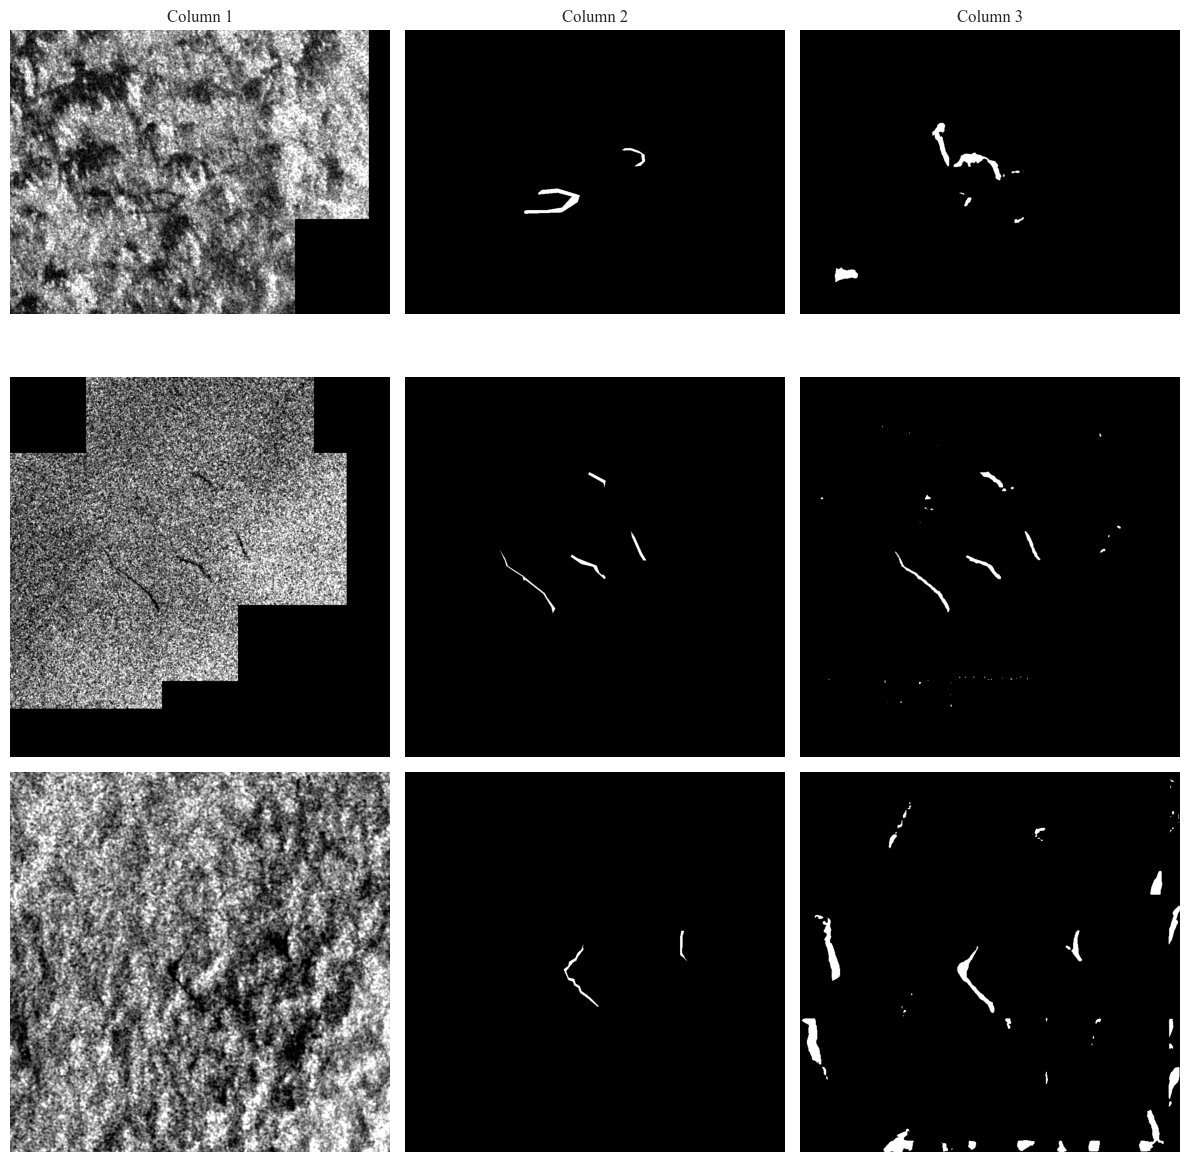

In [168]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

pixelsize = 25
tilesize = 512

# Assuming the images are stored in a directory 'images/'
images_path = []
i = 0
for sample in os.listdir(f'data/fig_samples/pred_{tilesize}_{pixelsize}'):
    i += 1
    if i <= 3:
        continue
    # if sample not in ['sample_130','sample_135','sample_118']:
    #     continue
    print(sample)
    for name in ['raw_mosaic','labels_mosaic','pred']:
        if name == 'labels_mosaic':
            tif_path = f'data/fig_samples/pred_{tilesize}_{pixelsize}/{sample}/{name}.png'
        else:  
            tif_path = f'data/fig_samples/pred_{tilesize}_{pixelsize}/{sample}/{name}.tif'
        images_path.append(tif_path)
        if len(images_path)==9:
            break
    if len(images_path)==9:
        break

images = [mpimg.imread(img_path) for img_path in images_path]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop through the axes and images to display them
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Show image in grayscale or change cmap if needed
    ax.axis('off')  # Hide axis to focus on the image
    # Optionally add labels for rows and columns
    if i % 3 == 0:  # Leftmost column
        ax.set_ylabel(f'Row {i//3 + 1}', fontsize=12)
    if i // 3 == 0:  # Top row
        ax.set_title(f'Column {i%3 + 1}', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# plt.savefig('latex/figures/preds.png',dpi=300)

# Show the plot
plt.show()


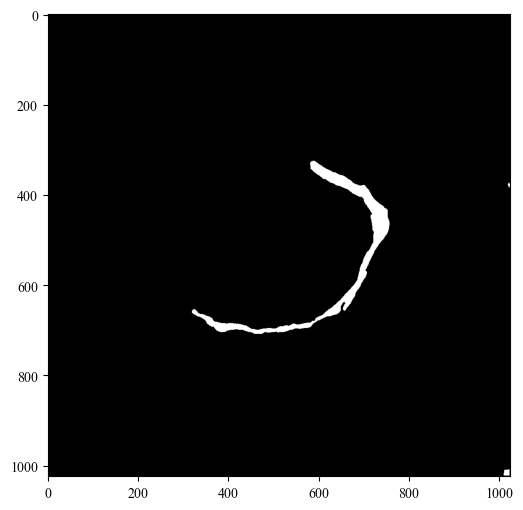

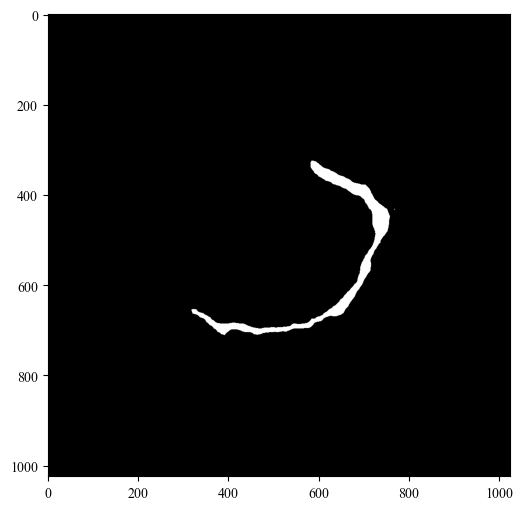

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define image path
image_path = "data/pred/pred_512_25/sample_135/pred_base.tif"

# Load and display the image
image = mpimg.imread(image_path)

plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')  # Use 'gray

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define image path
image_path = "data/fig_samples/pred_512_25/sample_135/pred_tl.tif"

# Load and display the image
image = mpimg.imread(image_path)

plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')  # Use 'gray



## fig 4

sample_11
sample_123
sample_135


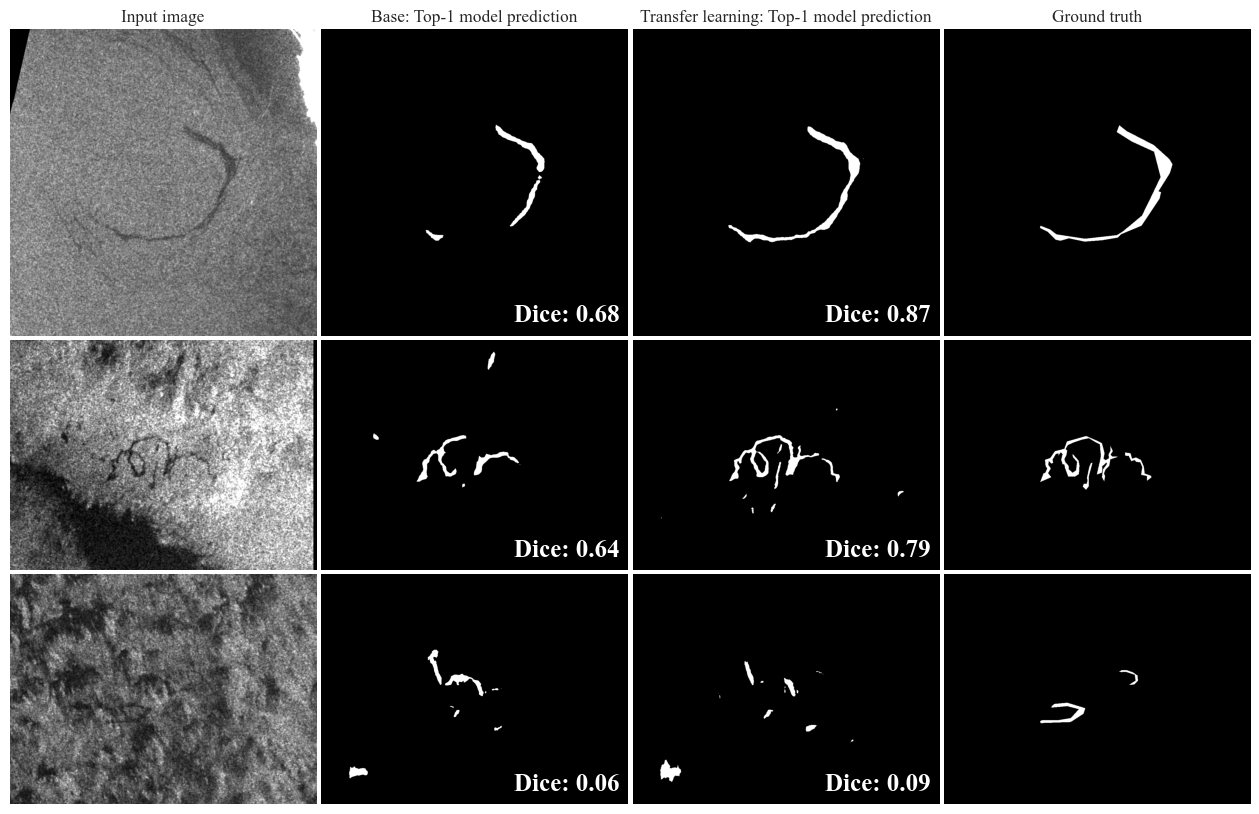

In [128]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import matplotlib.gridspec as gridspec

dice_values = np.random.rand(12)
dice_values[1] = 0.0557 
dice_values[2] = 0.0919
dice_values[5] = 0.6368 
dice_values[6] = 0.7931 
dice_values[9] = 0.6825
dice_values[10] = 0.8658 

plt.rcParams['font.family'] = 'serif'  # Set the font family
plt.rcParams['font.serif'] = ['Times New Roman']

pixelsize = 25
tilesize = 512

columns_fig = ['Input image', 'Base: Top-1 model prediction','Transfer learning: Top-1 model prediction', 'Ground truth']

images_path = []
i = 0
for sample in os.listdir(f'data/fig_samples/pred_{tilesize}_{pixelsize}'):
    if sample not in ['sample_11','sample_123','sample_135']:
        continue
    print(sample)
    for name in ['raw_mosaic-fix','pred_base','pred_tl','labels_mosaic']:
        if name == 'labels_mosaic':
            tif_path = f'data/fig_samples/pred_{tilesize}_{pixelsize}/{sample}/{name}.png'
        else:
            tif_path = f'data/fig_samples/pred_{tilesize}_{pixelsize}/{sample}/{name}.tif'

        images_path.append(tif_path)
        if len(images_path) == 12:  # Adjusted for 3x4 grid
            break
    if len(images_path) == 12:
        break

images = [mpimg.imread(img_path) for img_path in images_path]

# Create a figure with GridSpec WITHOUT an extra empty row
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 0.79, 0.83])  # Equal heights, controlled via hspace

# Loop through the images and assign them to subplots
axes = []
image_index = 0
for i, row in enumerate([2, 1, 0]):  # Reverse row order
    for j in range(4):  # 4 columns
        ax = plt.subplot(gs[row, j])  # Use reversed row index
        ax.imshow(images[image_index], cmap='gray') # Display image
        ax.axis('off')  # Hide axis
        axes.append(ax)

        if j in [1, 2]:  # Only for 2nd and 3rd columns
            ax.text(
                images[image_index].shape[1] - 26,
                # 100,  # X position (pixels)
                images[image_index].shape[0] - 48,  # Y position (bottom of image)
                f'Dice: {dice_values[image_index]:.2f}',  # Text content
                color='white',  # White text
                fontsize=18,
                fontweight='bold',
                bbox=dict(facecolor='black', alpha=1, edgecolor='none'), 
                ha='right'
            )
        image_index += 1

# Optionally add labels for rows and columns
for i in range(3):  # Row labels
    axes[i * 4].set_ylabel(f'Row {i+1}', fontsize=16)

for j in range(4):  # Column labels
    axes[2 * 4 + j].set_title(f'{columns_fig[j]}', fontsize=12.5)  # Assign to the new top row

# Adjust general spacing - reduce all row spacing except between row 2 & 3
plt.subplots_adjust(hspace=-.34, wspace=0.017)  # Control row spacing globally

# plt.savefig('latex/figures/preds4x3.png',bbox_inches='tight',dpi=300)

# Show the plot
plt.show()


sample_0
sample_2
sample_3


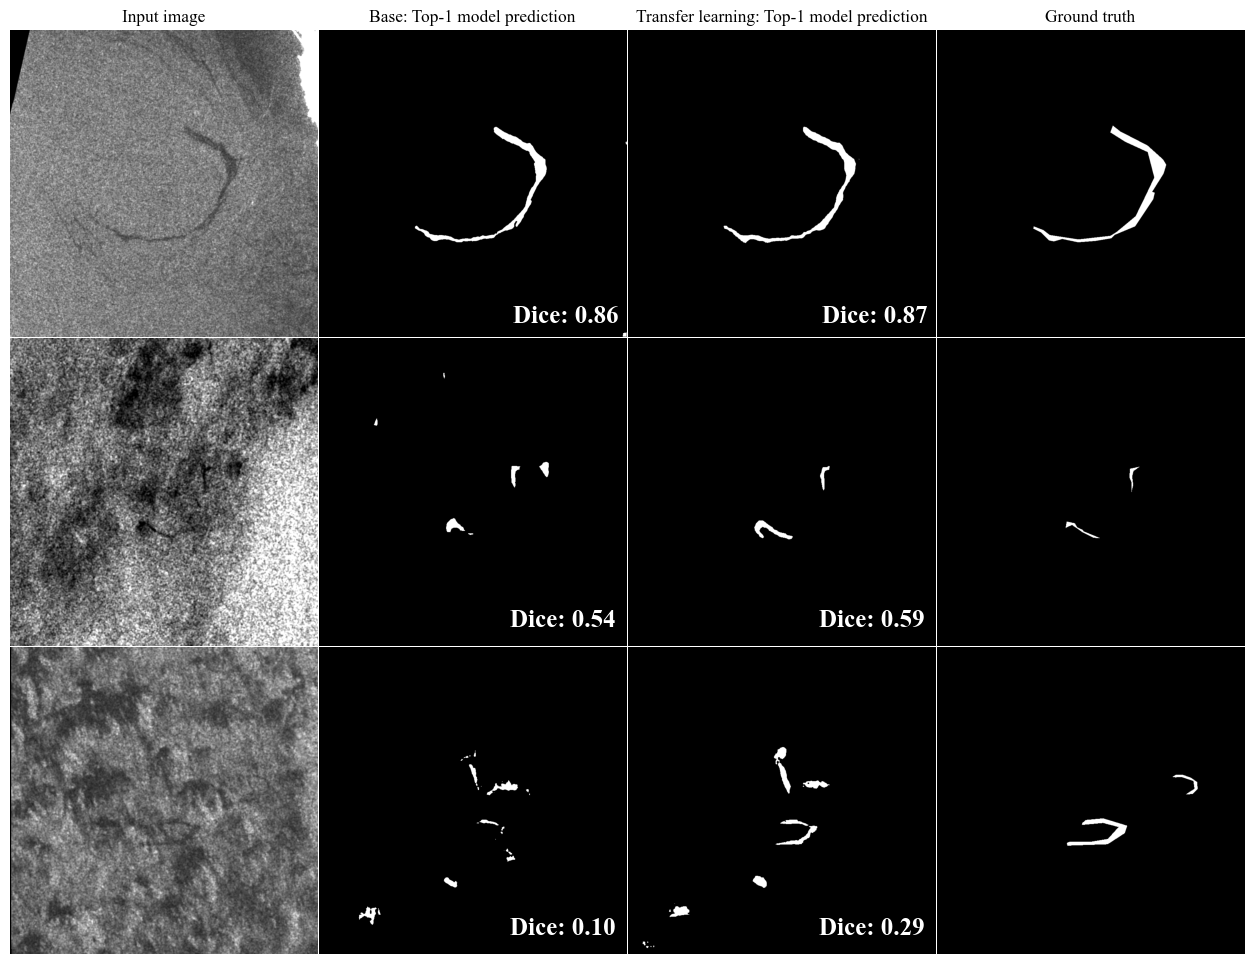

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

dice_values = np.random.rand(12)
#Sample 1 = Sample 119 (hard)
dice_values[1] = 0.1002 # Row 3
dice_values[2] = 0.2901# Row 3

#Sample 2 = Sample 90 (med)
dice_values[5] = 0.5439 # Row 2
dice_values[6] = 0.5935 # Row 2

#Sample 3 = Sample 135 (easy)
dice_values[9] = 0.8638 # Row 1
dice_values[10] = 0.8658 # Row 1

plt.rcParams['font.family'] = 'serif'  # Set the font family
plt.rcParams['font.serif'] = ['Times New Roman']

pixelsize = 25
tilesize = 512

columns_fig = ['Input image', 'Base: Top-1 model prediction','Transfer learning: Top-1 model prediction', 'Ground truth']

images_path = []
i = 0
for sample in os.listdir(f'data/fig_samples'):
#Sample 1 = Sample 119 (hard)
#Sample 2 = Sample 90 (med)
#Sample 3 = Sample 135 (easy)

    if sample not in ['sample_0','sample_2','sample_3']: 
        continue
    print(sample)
    for name in ['raw_mosaic-fix','pred_base','pred_tl','labels_mosaic']:
        if name == 'labels_mosaic':
            tif_path = f'data/fig_samples/{sample}/{name}.png'
        else:
            tif_path = f'data/fig_samples/{sample}/{name}.tif'

        images_path.append(tif_path)
        if len(images_path) == 12:  # Adjusted for 3x4 grid
            break
    if len(images_path) == 12:
        break

images = [mpimg.imread(img_path) for img_path in images_path]

# plt fig of shape 3,4
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 1])  # Equal heights, controlled via hspace

# Loop through the images and assign them to subplots
axes = []
image_index = 0
for i, row in enumerate([2, 1, 0]):  # Reverse row order
    for j in range(4):  # 4 columns
        ax = plt.subplot(gs[row, j])  # Use reversed row index
        ax.imshow(images[image_index], cmap='gray') # Display image
        ax.axis('off')  # Hide axis
        axes.append(ax)

        if j in [1, 2]:  # Only for 2nd and 3rd columns
            ax.text(
                images[image_index].shape[1] - 26,
                # 100,  # X position (pixels)
                images[image_index].shape[0] - 48,  # Y position (bottom of image)
                f'Dice: {dice_values[image_index]:.2f}',  # Text content
                color='white',  # White text
                fontsize=18,
                fontweight='bold',
                bbox=dict(facecolor='black', alpha=1, edgecolor='none'), 
                ha='right'
            )
        image_index += 1

# Optionally add labels for rows and columns
for i in range(3):  # Row labels
    axes[i * 4].set_ylabel(f'Row {i+1}', fontsize=16)

for j in range(4):  # Column labels
    axes[2 * 4 + j].set_title(f'{columns_fig[j]}', fontsize=12.5)  # Assign to the new top row

# Adjust general spacing - reduce all row spacing except between row 2 & 3
plt.subplots_adjust(hspace=0.004, wspace=-0.014)  # Control row spacing globally

plt.savefig('latex/figures/preds4x3_v2.png',bbox_inches='tight',dpi=300)

# Show the plot
plt.show()


In [ ]:
from PIL import Image
import numpy as np

def add_black_columns(image_path, output_path, columns=3):
    # Open the image
    img = Image.open(image_path)
    
    # Convert image to NumPy array
    img_array = np.array(img)
    
    # Get image height and channels
    height, width = img_array.shape[:2]
    
    # Create a black (zero-valued) column of the same height
    if img_array.ndim == 3:  # Color image (RGB or RGBA)
        black_column = np.zeros((height, columns, img_array.shape[2]), dtype=img_array.dtype)
    else:  # Grayscale image
        black_column = np.zeros((height, columns), dtype=img_array.dtype)

    # Concatenate black column to the left of the image
    new_img_array = np.concatenate((black_column, img_array), axis=1)
    
    # Convert back to Image
    new_img = Image.fromarray(new_img_array)
    
    # Save the modified image
    new_img.save(output_path)
    print(f"Image saved to {output_path}")

# Paths to your images
tif_image_path = "data/fig_samples/sample_0/raw_mosaic-fix.tif"
png_image_path = "data/fig_samples/sample_0/labels_mosaic.png"

# Output paths
tif_output_path = "data/fig_samples/sample_0 - Copy/raw_mosaic-fix.tif"
png_output_path = "data/fig_samples/sample_0/labels_mosaic.png"

# Apply the function
add_black_columns(tif_image_path, tif_output_path)
add_black_columns(png_image_path, png_output_path)


Image saved to data/fig_samples/sample_0 - Copy/raw_mosaic-fix.tif
Image saved to data/fig_samples/sample_0 - Copy/labels_mosaic.png


In [169]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import matplotlib.gridspec as gridspec

# dice_values = np.random.rand(12)
# #Sample 1 = Sample 119 (hard)
# dice_values[1] = 0.4451 # Row 3
# dice_values[2] = 0.436# Row 3

# #Sample 2 = Sample 90 (med)
# dice_values[5] = 0.5439 # Row 2
# dice_values[6] = 0.5935 # Row 2

# #Sample 3 = Sample 135 (easy)
# dice_values[9] = 0.6825 # Row 1
# dice_values[10] = 0.8658 # Row 1

# plt.rcParams['font.family'] = 'serif'  # Set the font family
# plt.rcParams['font.serif'] = ['Times New Roman']

# pixelsize = 25
# tilesize = 512

# columns_fig = ['Input image', 'Base: Top-1 model prediction','Transfer learning: Top-1 model prediction', 'Ground truth']

# images_path = []
# i = 0
# for sample in os.listdir(f'data/fig_samples'):
# #Sample 1 = Sample 119 (hard)
# #Sample 2 = Sample 90 (med)
# #Sample 3 = Sample 135 (easy)

#     if sample not in ['sample_0','sample_2','sample_3']: 
#         continue
#     print(sample)
#     for name in ['raw_mosaic-fix','pred_base','pred_tl','labels_mosaic']:
#         if name == 'labels_mosaic':
#             tif_path = f'data/fig_samples/{sample}/{name}.png'
#         else:
#             tif_path = f'data/fig_samples/{sample}/{name}.tif'

#         images_path.append(tif_path)
#         if len(images_path) == 12:  # Adjusted for 3x4 grid
#             break
#     if len(images_path) == 12:
#         break

# images = [mpimg.imread(img_path) for img_path in images_path]

# # plt fig of shape 3,4
# fig = plt.figure(figsize=(16, 12))
# gs = gridspec.GridSpec(3, 4, height_ratios=[1, 1, 0.8])  # Equal heights, controlled via hspace

# # Loop through the images and assign them to subplots
# axes = []
# image_index = 0
# for i, row in enumerate([2, 1, 0]):  # Reverse row order
#     for j in range(4):  # 4 columns
#         ax = plt.subplot(gs[row, j])  # Use reversed row index
#         ax.imshow(images[image_index], cmap='gray') # Display image
#         ax.axis('off')  # Hide axis
#         axes.append(ax)

#         if j in [1, 2]:  # Only for 2nd and 3rd columns
#             ax.text(
#                 images[image_index].shape[1] - 26,
#                 # 100,  # X position (pixels)
#                 images[image_index].shape[0] - 48,  # Y position (bottom of image)
#                 f'Dice: {dice_values[image_index]:.2f}',  # Text content
#                 color='white',  # White text
#                 fontsize=18,
#                 fontweight='bold',
#                 bbox=dict(facecolor='black', alpha=1, edgecolor='none'), 
#                 ha='right'
#             )
#         image_index += 1

# # Optionally add labels for rows and columns
# for i in range(3):  # Row labels
#     axes[i * 4].set_ylabel(f'Row {i+1}', fontsize=16)

# for j in range(4):  # Column labels
#     axes[2 * 4 + j].set_title(f'{columns_fig[j]}', fontsize=12.5)  # Assign to the new top row

# # Adjust general spacing - reduce all row spacing except between row 2 & 3
# plt.subplots_adjust(hspace=-.2, wspace=0.01)  # Control row spacing globally

# # plt.savefig('latex/figures/preds4x3_v3.png',bbox_inches='tight',dpi=300)

# # Show the plot
# plt.show()


# end

In [270]:
dice_values

array([0.382043, 0.769875, 0.984608, 0.608769, 0.827924, 0.076883, 0.956025, 0.371364, 0.348156, 0.642243, 0.814435,
       0.581181])